In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


from pyfrac.modelling.kirchhoff import Kirchhoff
from pylops.utils                      import dottest
from pylops.utils.wavelets             import *

In [24]:
rec_locs_a = np.array([[30.11, 9.89, 0.],
                      [24.45, 15.55, 0.],
                      [24.45, 24.45, 0.],
                      [30.11, 30.11, 0.],
                      [9.89, 9.89, 0.],
                      [15.55, 15.55, 0.],
                      [15.55, 24.45, 0.],
                      [9.89, 30.11, 0.],
                      ]).T
rec_locs_a.shape

(3, 8)

# SETUP MODEL

In [25]:
# Load velocity model
dimlims = 0.40  # 40cm cubed
dx = dy = dz = 0.01  # 5mm
nx = ny = nz = int(dimlims/dx)
x, y, z = np.arange(nx)*dx, np.arange(ny)*dy, np.arange(nz)*dz

# Subsurface properties
vp = 5260  # m/s
vs = 3260  # m/s
rho = 2590;  # kg/m3

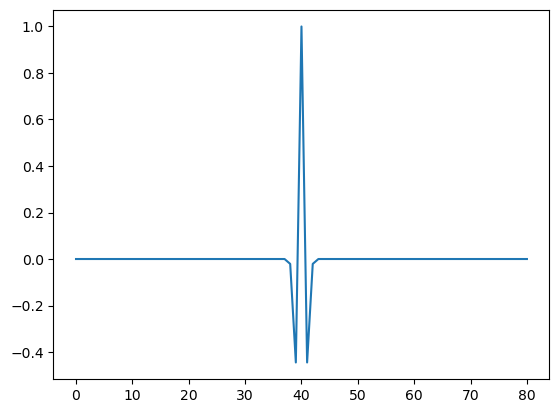

In [36]:
nt = 251
Fs = 125000  # 125 kHz sampling rate
dt = 1/Fs
t = np.arange(nt)*dt

Fc = 50000
wav, wavt, wavc = ricker(t[:41], f0=Fc)

plt.plot(wav)

In [45]:
# INITIALISE OPERATOR
Op = Kirchhoff(z=z, 
               x=x, 
               y=y, 
               t=t, 
               srcs=rec_locs_a[:, :1], 
               recs=rec_locs_a, 
               vel=vp, 
               wav=wav, 
               wavcenter=wavc, 
               mode='analytic',)

# check operator with dottest
_ = dottest(Op, verb=True)

Dot test passed, v^H(Opu)=0.0 - u^H(Op^Hv)=0.0


In [40]:
rec_locs_a[0].shape

(8,)

In [63]:
trav = Kirchhoff._traveltime_table(z, x, rec_locs_a, y=y, vel=vp, mode='analytic')

40 40 40
(64000, 8)
(64000, 8)
(64000, 8)


In [64]:
trav.shape

(64000, 8)

In [75]:
min_tt = np.min(trav,axis=1)
max_tt = np.max(trav,axis=1)

max_diff_tt = max_tt - min_tt
max_diff_tt_3d = max_diff_tt.reshape(nx,ny,nz)

In [76]:
max_diff_tt_3d[20,20,20]

0.005436199937741203

In [74]:
len(max_diff_tt)

64000

In [72]:
max_diff_tt

array([0.00543639, 0.00543639, 0.00543639, ..., 0.00543573, 0.00543569,
       0.00543566])

In [77]:
dt

8e-06